# 理论知识回顾
## 回归问题概述
&emsp; <font color=green size=4>1.1 缘由</font>  
&emsp; <font color=green size=4>1.2 线性回归</font>  
&emsp; <font color=green size=4>1.3 线性回归正则化</font>  
&emsp; <font color=green size=4>1.4 决策树回归</font>  



# 案例实战-汽油消耗量预测
## 一 探索性数据分析
## 二 单因素线性回归模型
&emsp; <font color=green size=4>2.1 数据读取</font>  
&emsp; <font color=green size=4>2.2 数据拆分</font>  
&emsp; <font color=green size=4>2.3 模型训练</font>  
&emsp; <font color=green size=4>2.4 预测结果可视化</font>  
&emsp; <font color=green size=4>2.5 MSE</font>  

## 三 多元线性回归模型
&emsp; <font color=green size=4>3.1 数据拆分</font>  
&emsp; <font color=green size=4>3.2 模型构建</font>  
&emsp; <font color=green size=4>3.3 模型评测</font>  

## 四 决策树回归模型
&emsp; <font color=green size=4>4.1 特征工程</font>  
&emsp; <font color=green size=4>4.2 模型构建</font>  
&emsp; <font color=green size=4>4.3 模型评价</font>  
&emsp; <font color=green size=4>4.4 缺失值填充</font>  


## 1.1 缘由
1855年， 高尔顿发表《遗传的身高向平均数方向的回归》一文，他和他的学生卡尔•皮尔逊Karl·Pearson通过观察1078对夫妇的身高数据，以每对夫妇的平均身高作为自变量，取他们的一个成年儿子的身高作为因变量，分析儿子身高与父母身高之间的关系，发现父母的身高可以预测子女的身高，两者近乎一条直线。当父母越高或越矮时，子女的身高会比一般儿童高或矮，他将儿子与父母身高的这种现象拟合出一种线形关系，分析出儿子的身高y与父亲的身高x大致可归结为以下关系：
$$y=33.73+0.516*x$$  (单位为英寸)    
根据换算公式1英寸=0.0254米， 1米=39.37英寸。单位换算成米后：Y= 0.8567+0.516*X  (单位为米)  
假如父母辈的平均身高为1.75米，则预测子女的身高为1.7597米。   
这种趋势及回归方程表明父母身高每增加一个单位时，其成年儿子的身高平均增加0.516个单位。这就是回归一词最初在遗传学上的含义。

回归模型中，我们需要关注或预测的变量叫做因变量，我们选取的用来解释因变量变化的变量叫做自变量。

## 1.2 线性回归

主要包括一元线性回归、多元线性回归。参数估计：最小二乘估计。

### 1.2.1 一元线性回归  

基本假设$y=w_0+w_1x+\epsilon$，其中$w_0$,$w_1$为回归系数，$\epsilon$为随机误差项(noise)，假设$\epsilon$服从$N(0, \sigma^2)$，则随机变量$y$满足$N(w_0+w_1x, \sigma^2)$

### 1.2.2 多元线性回归
$y=w^Tx+\epsilon$
    
其中$x=(x_1,x_2,…,x_d)^T$为自变量，$w=(w_1,w_2,…,w_d)^T$为回归系数
### 1.2.3 问题

实际数据可能不是线性的；多重共线性；过拟合等。

### 1.2.4 解决方案

正则化、主成分回归、偏最小二乘回归。

## 1.3 线性回归正则化

正则化可以减小线性回归的过度拟合和多重共线性等问题。

#### 1.3.1 LASSO

是一种系数压缩估计方法，它的基本思想是通过追求稀疏性自动选择重要的变量，对应参数惩罚函数为L1范数。

#### 1.3.2 岭回归（Ridge Regression）

最小二乘法的目标函数上加上一个对$w$的惩罚函数，对应参数惩罚函数为L2范数。

## 1.4 决策树回归
<img src="./img/决策树回归.png" width = "500" height = "320" alt="图片名称" align=left />

# 汽油消耗量预测

## 一、探索性数据分析 

### 1.1 导入数据 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

cars = pd.read_csv('./data/auto-mpg.data',
        names=["燃油效率","气缸","排量","马力","重量","加速度","型号年份","编号","原产地"], delim_whitespace = True)
cars.shape

(398, 9)

In [2]:
cars.head()

,燃油效率,气缸,排量,马力,重量,加速度,型号年份,编号,原产地
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 1.2 添加SimHei

操作步骤：
    1. 获取字体库目录
        import matplotlib
        print (matplotlib.matplotlib_fname())
    2. 下载字体文件SimHei.ttf，并放入matplotlib/mpl-data/fonts/ttf/下
    3. 重新编译
        from matplotlib.font_manager import _rebuild
        _rebuild()

In [3]:
import matplotlib
print (matplotlib.matplotlib_fname())

/Users/yueyang/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [9]:
from matplotlib.font_manager import _rebuild
_rebuild()

### 1.3 探究数据关系

In [12]:
error = cars[cars.马力 == '?']
error

,燃油效率,气缸,排量,马力,重量,加速度,型号年份,编号,原产地


In [13]:
cars['马力'].describe()

count       392
unique       93
top       150.0
freq         22
Name: 马力, dtype: object

In [14]:
#cars['马力'].value_counts()

In [15]:
import numpy as np
import matplotlib.ticker as ticker

#删除horsepower值为'?'的行
cars = cars[cars.马力 != '?']

Text(0.5, 1.0, '型号年份')

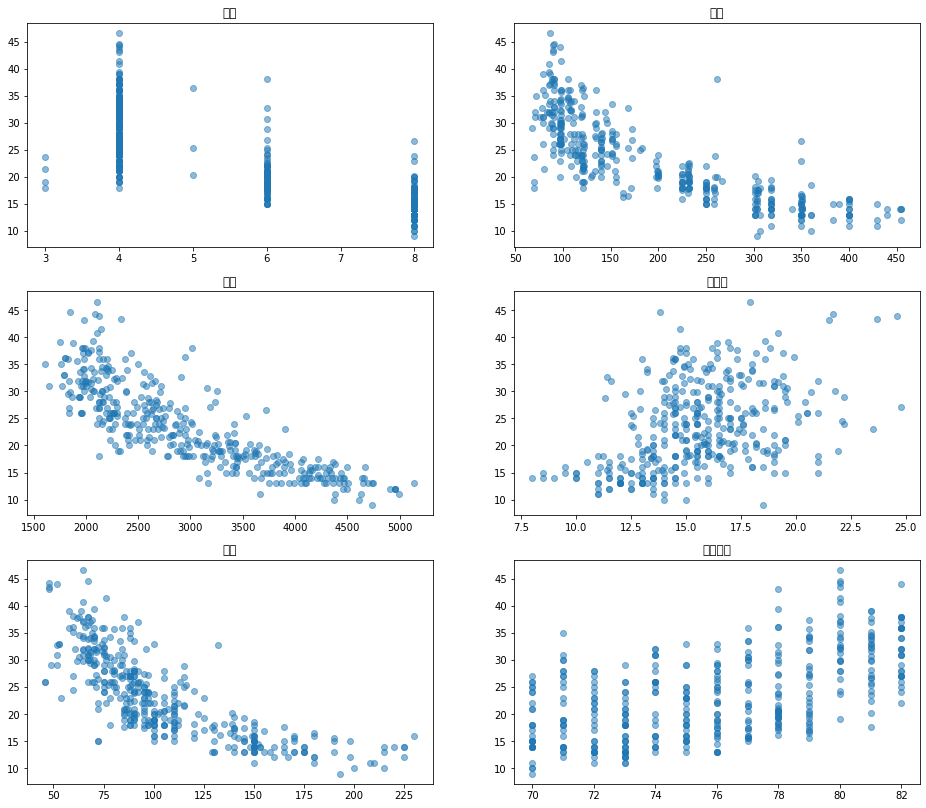

In [17]:

#设置中文显示
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

#用散点图分别展示气缸、排量、重量、加速度与燃油效率的关系
fig = plt.figure(figsize = (16,14))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.scatter(cars['气缸'], cars['燃油效率'], alpha=0.5)
ax1.set_title('气缸')
ax2.scatter(cars['排量'], cars['燃油效率'], alpha=0.5)
ax2.set_title('排量')
ax3.scatter(cars['重量'], cars['燃油效率'], alpha=0.5)
ax3.set_title('重量')
ax4.scatter(cars['加速度'], cars['燃油效率'], alpha=0.5)
ax4.set_title('加速度')
ax5.scatter([ float(x) for x in cars['马力'].tolist()], cars['燃油效率'], alpha=0.5)
ax5.set_title('马力')
ax6.scatter(cars['型号年份'], cars['燃油效率'], alpha=0.5)
ax6.set_title('型号年份')

## 二、单因素线性回归模型

### 2.1 提取数据 
从上面已经可以看出汽车与燃油有着线性关系，下面我们将用这部门数据进行训练

In [10]:
Y = cars[['燃油效率']]
X = cars[['重量']]

### 2.2 数据拆分 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### 2.3 模型构建 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR = LR.fit(X_train, Y_train)

### 2.4 可视化预测结果

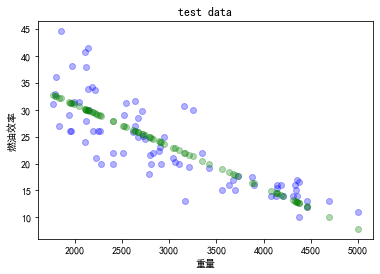

In [13]:
plt.scatter(X_test, Y_test, color='blue', alpha=0.3)
plt.scatter(X_test, LR.predict(X_test), color='green', alpha=0.3)
plt.xlabel("重量")
plt.ylabel("燃油效率")
plt.title("test data")
plt.show()

### 2.5 计算评测指标MSE

In [14]:
mean_squared_error(Y_test, LR.predict(X_test))

19.98495628492109

## 三、多元线性回归

In [15]:
Y = cars[['燃油效率']]
X = cars[['重量','马力','排量']]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### 3.1 训练模型 

In [17]:
#初始化模型
mul_LR_model = LinearRegression()
#拟合模型
mul_LR_model.fit(X_train, Y_train)
#预测
Y_test['燃料效率预测值'] = mul_LR_model.predict(X_test)
#显示
Y_test.head()

,燃油效率,燃料效率预测值
146,28.0,29.895333
282,22.3,24.793741
69,12.0,12.121006
378,38.0,30.331334
331,33.8,30.081681


### 3.2 模型评测 

In [20]:
mean_squared_error(Y_test['燃油效率'], mul_LR_model.predict(X_test))

18.698520956062342

### 3.可视化预测结果 

In [21]:
test = pd.concat([X_test,Y_test], axis=1)
test.head()

,重量,马力,排量,燃油效率,燃料效率预测值
146,2125.0,75.00,90.0,28.0,29.895333
282,2890.0,88.00,140.0,22.3,24.793741
69,4456.0,160.0,350.0,12.0,12.121006
378,2125.0,63.00,105.0,38.0,30.331334
331,2145.0,67.00,97.0,33.8,30.081681


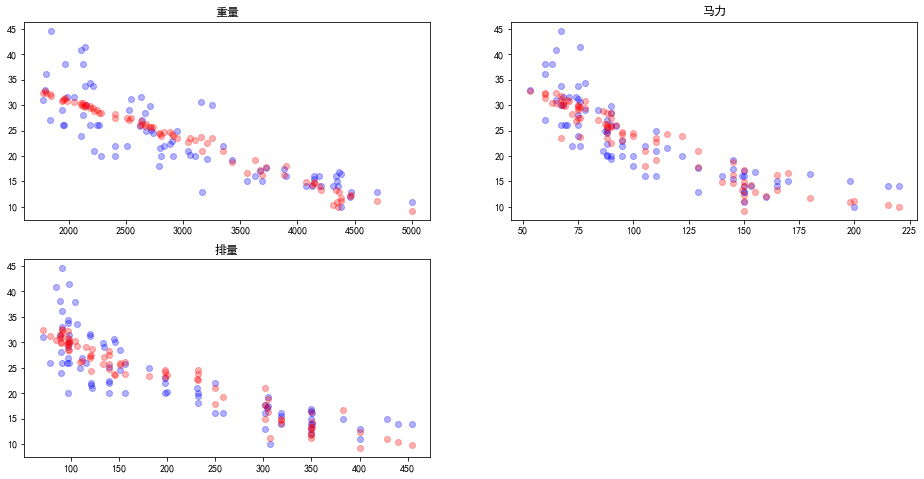

In [22]:

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax1.scatter(test['重量'], test['燃油效率'], c='blue', alpha=0.3)
ax1.scatter(test['重量'], test['燃料效率预测值'], c='red', alpha=0.3)
ax1.set_title('重量')
ax2.scatter([ float(x) for x in test['马力'].tolist()], test['燃油效率'], c='blue', alpha=0.3)
ax2.scatter([ float(x) for x in test['马力'].tolist()], test['燃料效率预测值'], c='red', alpha=0.3)
ax2.set_title('马力')
ax3.scatter(test['排量'], test['燃油效率'], c='blue', alpha=0.3)
ax3.scatter(test['排量'], test['燃料效率预测值'], c='red', alpha=0.3)
ax3.set_title('排量')
plt.show()

## 红色为燃油销量预测结果

## 四、决策树回归

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
cars = pd.read_csv('./data/auto-mpg.data',
        names=["燃油效率","气缸","排量","马力","重量","加速度","型号年份","编号","原产地"], delim_whitespace = True)
cars.shape

(398, 9)

In [25]:
error = cars[cars.马力 == '?']

#删除horsepower值为'?'的行
cars = cars[cars.马力 != '?']

In [26]:
cars.dtypes # 检查数据类型

燃油效率    float64
气缸        int64
排量      float64
马力       object
重量      float64
加速度     float64
型号年份      int64
编号        int64
原产地      object
dtype: object

In [27]:
cars['马力'] = cars['马力'].astype(float)
cars.dtypes # 检查数据类型

燃油效率    float64
气缸        int64
排量      float64
马力      float64
重量      float64
加速度     float64
型号年份      int64
编号        int64
原产地      object
dtype: object

### 4.1 特征工程

In [28]:

X = cars.drop('燃油效率', axis=1)
y_new = cars[['燃油效率']]
X_new = pd.get_dummies(X) # 将所有的分类型特征转换为数字, 虚拟变量: dummy variables


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, 
                                                   test_size=.2, 
                                                   random_state=10)

### 4.2 模型构建

In [30]:

from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(random_state=0)
clf = clf.fit(X_train, y_train)
y_test['燃油效率预测值'] = clf.predict(X_test)
y_test.head()


,燃油效率,燃油效率预测值
243,21.5,26.5
371,29.0,33.5
300,23.9,15.0
345,35.1,39.1
265,17.5,15.5


### 4.3 模型评价

In [31]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test['燃油效率预测值'], y_test['燃油效率'])

13.222025316455696

In [40]:

# 衡量线性回归的MSE 、 RMSE、 MAE
mse = np.sum((y_test['燃油效率'] - y_test['燃油效率预测值'] ) ** 2) / len(y_test)
rmse = math.sqrt(mse)
mae = np.sum(np.absolute(y_test['燃油效率'] - y_test['燃油效率预测值'])) / len(y_test)
r2 = 1-mse/ np.var(y_test)
print("mse:",mse," rmse:",rmse," mae:",mae," r2:",r2)

mse: 12.623037974683543  rmse: 3.5528914949212203  mae: 2.463291139240506  r2: 燃油效率       0.794260
燃油效率预测值    0.800993
dtype: float64


In [37]:
import math

### 4.4 缺失值填充

#### 4.4.1 均值填充 | -1填充

In [32]:
error['马力'] = np.mean(cars['马力'])

errorDf = pd.get_dummies(error) # 将所有的分类型特征转换为数字, 虚拟变量: dummy variables
errorDf

for col in X_train.columns:
    if col not in errorDf.columns:
        errorDf[col] = 0

#### 4.4.2 构建模型

In [33]:

from sklearn.tree import DecisionTreeRegressor

X = pd.concat([X_train, errorDf[X_train.columns]])
Y = pd.concat([y_train, errorDf[y_train.columns]])

clf = DecisionTreeRegressor( random_state=0 )
clf = clf.fit(X, Y)
y_test['燃油效率预测值'] = clf.predict(X_test)
y_test.head()


,燃油效率,燃油效率预测值
243,21.5,25.5
371,29.0,27.2
300,23.9,19.9
345,35.1,39.1
265,17.5,15.5


In [34]:
mean_squared_error(y_test['燃油效率预测值'], y_test['燃油效率'])

12.623037974683543

#### 4.4.3 其他填充

Text(0.5, 1.0, '马力')

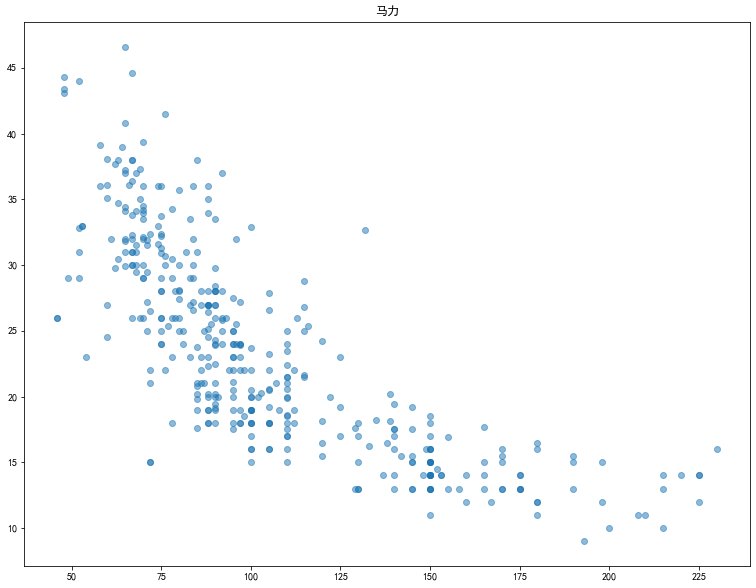

In [35]:

#设置中文显示
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

#用散点图分别展示气缸、排量、重量、加速度与燃油效率的关系
fig = plt.figure(figsize = (13,10))
ax = fig.add_subplot(111)
ax.scatter([ float(x) for x in cars['马力'].tolist()], cars['燃油效率'], alpha=0.5)
ax.set_title('马力')
